# 3. Probability Inequalities
Probability inequality play a large role in determining an answer to the crucial question: Is learning feasible? Of course in this context I am referring to statistical/machine learning. You may think to yourself: "Of course it is possible! We constantly here about wonderful new algorithms and ML techniques created, computer vision systems, natural language understanding virtual assistants-many of which are discussed in depth in this blog!". In this you are most certainly correct. 

However, what my question specifically is honing in on is:

> Can we provide a theoretical back bone to ensure that the learning that we are doing will indeed generalize?

Answering that question is the purpose of this post. In order to get there we will actually move backwards. To start I will show the few equations that prove learning is indeed possible, and we will then go through several derivations in order to expose how we arrived at our answer.

## 1. Is Learning Feasible?
I want us to start by supposing the following: We are dealing with a **sample** from a **population**:

$$\mu = \text{population parameter}$$

$$\nu = \text{sample parameter}$$

$$N = \text{sample size}$$

$$\epsilon = \text{very small value}$$

Now, in a very large sample (i.e. $N$ is large) we know that $\nu$ is probably close to $\mu$ (if this is unfamiliar I recommend looking at my statistics post on the central limit theorem). Another way of saying that these two values are close is by saying there are within $\epsilon$ of eachother:

$$\big| \nu - \mu \big| < \epsilon$$

Our goal though is to make this a bit more concrete; put another way, we want to be able to offer a _guarantee_ about $\nu$. How probable is it that it is within $\epsilon$ of $\mu$? Well, we can prove that the probability that $\nu$ is _not_ with $\epsilon$ of $\mu$ is:

$$P\big( \big| \nu - \mu \big| > \epsilon \big) \leq 2e^{-2\epsilon^2N}$$

Where the equation above is known as **Hoeffding's Inequality**. The statement is known as a P.A.C. statement-meaning that it is _probably_, _approximately correct_. In english, it says the following:

> The probability that the difference between the sample and the population parameter is greater than $\epsilon$ is less than the exponential of $e^{-\epsilon^2N}$.

From a slightly more formal vantage point, it provides an upper bound on the probability that the sum of bounded _independent random variables_ deviates from its expected value by more than a certain amount. This inequality is a member of the **Law of Large Numbers**.

### 1.1 Extending to Learning
With relative ease we can extend this to learning. In order to do so we will need a bit of new notation. We are going to introduce $h$, $\hat{E}(h)$ and $E(h)$, where they are defined as:

$$h = \text{Learned Hypothesis/Model}$$

$$\hat{E}(h) = \text{Training set Error}$$

$$E(h) = \text{Population Error}$$

For those familiar with machine learning this should be rather clear, but if you are not I will provide a bit of context. In a general learning scenario we acknowledge that there is a population data set that we _do not have access to_. It contains _every single data point_ that exists. We only have access to a _training data set_, which is a very small sample from the population. If we learn a model, $h$, that makes predictions on input data points, then $\hat{E}(h)$ is the error that $h$ would make on the _training data set_, while $E(h)$ is the error that $h$ would make on the population data set.  

What we want to ensure is that if $h$ is learned based off of our training data, can it generalize? In other words, we want to have some sort of guarantee on the difference between the error between $\hat{E}(h)$ and $E(h)$. We will refer to the probability of this difference as the _bad event_, since we do not want it to happen:

$$\overbrace{P\big( \big| \hat{E}(h) - E(h) \big| > \epsilon \big)}^\text{Bad event}$$

We want a bound on this bad event-a worst case guarantee. Once again we can use the hoeffding bound (since it deals with the sum of random variables differing from their expected value-here the error of each data point is a random variable and $E(h)$ is the expected value of the error):

$$P\big( \big| \hat{E}(h) - E(h) \big| > \epsilon \big) \leq 2e^{-2\epsilon^2N}$$

Where $\hat{E}(h)$ is the estimated sample error and $E(h)$ is the true error. Now, in all actuality we know that there are multiple hypothesis that we will be choosing from, so our equation can be expanded:

$$P\big( \big| \hat{E}(h) - E(h) \big| > \epsilon \big) \leq \sum_{m=1}^M P\big( \big| \hat{E}(h_m) - E(h_m) \big| > \epsilon \big) $$

Above we are simply taking the probability associated with each of $M$ hypotheses having an error greater than $\epsilon$ and summing them all up. This is known as the **[union bound](https://en.wikipedia.org/wiki/Boole%27s_inequality)** and specifically states that:

> For any finite or countable set of events, the probability that at least one of the events happens is no greater than the sum of the probabilities of the individual events. 

So, essentially we are taking the _worst_ case and adding up all of the probabilities associated with the error difference between the sample and true hypothesis being greater than $\epsilon$. The reason we want the worst case is because we don't want to jeopardize the _applicability_ of our results. I should note that while this type of assumption is in fact simplistic, it is not trivially restricting but rather it is intended to ensure we are not missing some scenario that could be worse than what we are willing to accept. 

We can then substitute the hoeffding bound that was shown earlier:

$$P\big( \big| \hat{E}(h) - E(h) \big| > \epsilon \big) \leq \sum_{m=1}^M 2e^{-2\epsilon^2N} $$

Which provides us with our final takeaway:

> We can be confident that the probability that the difference between our training error and the population error is larger than our tolerance ($\epsilon$, the bad event), under the true learning scenario of generating $M$ hypothesis and picking the _best_ one, is less than or equal to the summation on the right.

Note that the right hand side has an exponential in it which is good! That will decay towards zero quickly. However, we also have a $\epsilon^2$ term which will slow the decay to zero. And even more unfortunately, there is an added factor $M$:

$$P\big( \big| \hat{E}(h) - E(h) \big| > \epsilon \big) \leq 2Me^{-2\epsilon^2N} $$

We obviously want the probability of our bad event to be small, and hence we don't like having to magnify the right hand side, because that is the probability of something bad happening. Now, we can see that if we use $M=10$ hypothesis we are probably okay. On the other hand, if we use $M= one \; million$ hypothesis, we may run into trouble. 

Now, we will get into what happens when we have many (eventually infinite) hypothesis in a post on the **theory of generalization**, but for now I want to move on and discuss the bound above.

## 2. Probability Bounds and Inequalities
How exactly did we arrive at that interesting looking exponential bound defined as the Hoeffding Inequality? More generally, what is the point of a bound? The best way to answer both of the above questions is via a derivation of the Hoeffding Inequality itself. Now, in order to get there we will need to build up our knowledge of several other inequalities, so let's get started. 

### 2.1 Markov Inequality 
It may not be entirely clear what exactly the point of a probability bound is, specifically in the context of learning above. In order to gain a full appreciation, consider the following: 

> We may be interested in saying something about the probability of an extreme event. Suppose that unfortunately we only know a little bit about the probability distribution at hand, in this case we only know the expected value. Can we still saying something about the probability of an extreme event occuring? 

Above is precisely the goal of probabilistic inequalities. We want to be able to make mathematically backed claims about the probabilities of certain (often bad) events occurring. I like to think about inequalities allowing the following transition:

$$\text{Intuitive statement} \rightarrow \text{Precise, mathematically backed statement}$$

The best way to gain an intuitive understanding of this is via an example, and one that is crucial in understanding the hoeffding derivation, that is the [**Markov Inequality**](https://en.wikipedia.org/wiki/Markov%27s_inequality). The Markov Inequality, at its core, is trying to take an intuitive statement and provide it a mathematical backing. The intuitve statement is as follows:

> If $X \geq 0$ and $E[X]$ is small, then $X$ is unlikely to be very large.

Intuitively that should make sense! If $E[X] = 1.2$ then the probability of $X = 10,000,000$ should be incredibly small. What the Markov Inequality allows us to do is make the intuitive statement much more precise. It states:

$$ \text{If} \; X \geq 0 \; \text{and} \; a >0, \text{then} \; P(x \geq a) \leq \frac{E[X]}{a}$$

#### Derivation 1
How exactly do we arrive at the above inequality? Well, our derivation looks as follows; first, we recall the expected value of $X$:

$$E[X] = \int_{0}^{\infty} x f_x(x) dx$$

Which, we can then state the following:

$$E[X] = \overbrace{\int_{0}^{\infty} x f_x(x) dx}^\text{Expected value of x} \;\; \geq  \;\;\overbrace{\int_{a}^{\infty} x f_x(x) dx}^\text{Smaller bound, less area}$$

The above is true because when integrating from $[a, \infty]$ we are dealing with less total area. We can then focus on this new integral:

$$\int_{a}^{\infty} x f_x(x) dx$$

Which we can note that when evaluated $x$ will always be at least as large as $a$, given our bounds. This allows us to write:

$$\int_{a}^{\infty} x f_x(x) dx \;\; \geq \;\; \int_{a}^{\infty} a f_x(x) dx$$

And since $a$ is a constant we can pull that out:

$$\int_{a}^{\infty} x f_x(x) dx \;\; \geq \;\; a \overbrace{\int_{a}^{\infty} f_x(x) dx}^{P(x \geq a)}$$

Substituting $P(x \geq a)$ for our right integral:

$$\overbrace{\int_{a}^{\infty} x f_x(x) dx}^\text{Integral 1} \;\; \geq \;\; aP(x \geq a)$$

Recall the first line of our derivation:

$$E[X] = \int_{0}^{\infty} x f_x(x) dx \;\; \geq  \;\; \overbrace{\int_{a}^{\infty} x f_x(x) dx}^\text{Integral 1}$$

We can substitute in $aP(x \geq a)$ for integral 1 (because of the matching inequalities):

$$E[X] \;\; \geq  \;\; aP(x \geq a)$$

Which can be written equivalently as:

$$P(x \geq a) \;\; \leq  \;\; \frac{E[X]}{a}$$

And with that we have arrived at the inequality that we were trying prove!

#### Derivation 2
I'd like to also walk through a second derivation which may provide a nice alternative way of looking at things. We will start by defining a new variable $Y$:

$$
Y =
\begin{cases}
 0, & \text{if } x < a \\
 a, & \text{if } x \geq a
\end{cases}
$$

We can see above that in all cases $Y \leq X$, and hence:

$$E[Y] \leq E[X]$$

Next, we can solve for the expected value of $Y$:

$$E[Y] = 0 \cdot P(X < a) + a \cdot P(X \geq a) = a \cdot P(X \geq a)$$

This allows us to rewrite our prior inequality as:

$$a \cdot P(X \geq a) \;\; \leq \;\; E[X]$$

And with a simple algebraic manipulation we again arrive at the Markov Inequality:

$$P(X \geq a) \;\; \leq \;\; \frac{E[X]}{a}$$

#### Example
Now, why exactly is this useful? Consider the following example: we have a random variable $X$ that is exponentially distributed with $\lambda = 1$:

$$
f(x ; \lambda) =
\begin{cases}
 \lambda e ^{-\lambda x}, & \text{if } x \geq 0 \\
 0, & \text{if } x <0
\end{cases}
$$

And since $\lambda = 1$, we can rewrite the above as:

$$
f(x ; \lambda = 1) =
\begin{cases}
 e ^{-x}, & \text{if } x \geq 0 \\
 0, & \text{if } x <0
\end{cases}
$$

A [property of the exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution#Mean,_variance,_moments_and_median) is that it's expected value is equal to:

$$E[X] = \frac{1}{\lambda}$$

And in this case that evaluates to $E[X] = 1$. Because $X$ is a random variable, we can apply the Markov Inequality! 

$$P(X \geq a) \;\; \leq \;\; \frac{E[X]}{a}$$

Substituting in our expected value of 1:

$$P(X \geq a) \;\; \leq \;\; \frac{1}{a}$$

Taking a step back, let's restate our goal here:

> We are trying to bound the probability $P(X \geq a)$. Often we won't know it's exact value, so knowing the worst case can be very helpful.

Now, because we _know_ the distribution that $X$ takes on, we actually do know the true value for this probability:

$$P(X \geq a) = e^{-a}$$

However, as stated above, we often don't know the true distribution. By making use of the little bit of information that we are assuming that we _do know_ about $X$, namely that it is a random variable and has an expected value of 1, we can apply the Markov Inequality in order to get a guarantee on the probability that $X$ is greater than or equal to $a$. 

Visually, we can see the true probability and the bound generated via the Markov Inequality below (for visualization purposes $a$ is equal to 1 below):

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

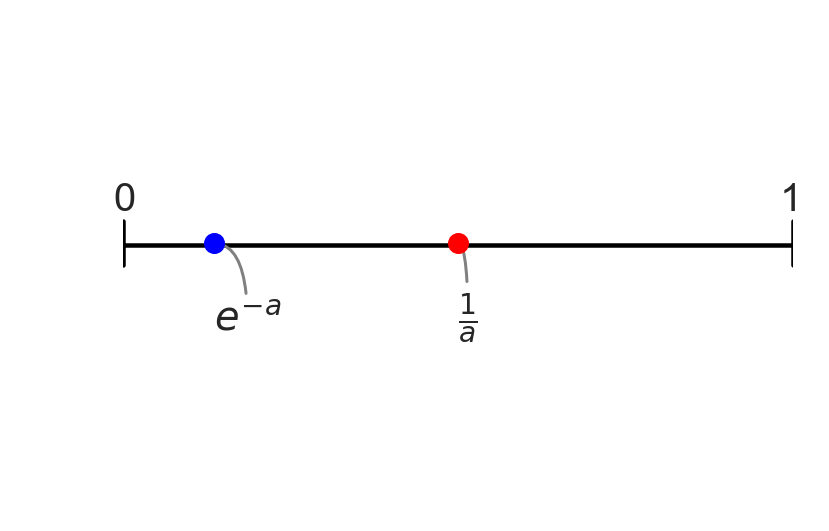

In [36]:
fig, ax = plt.subplots()
ax.set_xlim(0,1)
ax.set_ylim(-.1,.1)

plt.hlines(-0.001, 0, 1, color='black', zorder=1)

a = 2
true_prob = np.e ** (-a)
markov_inequality_bound = 1 / a


plt.scatter(true_prob,0, zorder=2, color="blue")
plt.scatter(markov_inequality_bound,0, zorder=2, color="red")

plt.axvline(1, 0.45, 0.55, color='black')
plt.axvline(0, 0.45, 0.55, color='black')

plt.annotate(
    '0',
    xy=(0, 0),
    xytext=(-.015, 0.015),
    size=20,
)
plt.annotate(
    '1',
    xy=(0, 0),
    xytext=(0.98, 0.015),
    size=20,
)

plt.annotate(
    r'$e^{-a}$',
    xy=(true_prob, -0.00008),
    xytext=(true_prob, -0.04),
    size=20,
    arrowprops=dict(color='grey',arrowstyle="-", connectionstyle="angle3,angleA=90,angleB=0"),
    zorder=1
)
plt.annotate(
    r'$\frac{1}{a}"$',
    xy=(markov_inequality_bound, -0.00008),
    xytext=(markov_inequality_bound, -0.04),
    size=20,
    arrowprops=dict(color='grey',arrowstyle="-", connectionstyle="angle3,angleA=90,angleB=0"),
    zorder=1
)

plt.axis('off')
plt.show()

Now, in general we consider a bound good or useful if the bound is close the correct value. Clearly we can see that in this case the bound is not very close the actual value. For an idea of the numerical values involved here, when evaluated we have:

In [40]:
print("True probability: ", round(np.e**(-2), 5))
print("Markov Inequality Bound: ", 1/2)

True probability:  0.13534
Markov Inequality Bound:  0.5


So, cleary the bound is correct, however it is not incredibly useful. If I told you that $P(X \geq a)$ is less than 0.99 I would be correct, but you would most likely roll your eyes and say that is obvious. The same thing is occuring here. The true probability will fall off exponetially as $a$ increases in magnitude, while the Markov Inequality will fall off at $\frac{1}{X}$. This raises the question: Are there other inequalities that can yield a more useful bound? 

### 2.2 Chebyshev Inequality
The answer to that question is a resounding _yes_. There are indeed many other inequalities that exist that can produce more informative and useful bounds. 